### companion to threshold_count to visualize our data

In [1]:
library(ggplot2)
library(plyr)
library(reshape2)

In [8]:
#### A
test_A <- read.csv('~/Dropbox/sdworkin2016/genotype_A.csv')
#test_A <- read.csv('~/Dropbox/sdworkin2016/solute_A.csv')

test_A$pref_index <- as.numeric(as.character(test_A$pref_index))
pref_A <- data.frame('genotype' = 'ppk00582', 'pref' = test_A[!is.na(test_A$pref_index),]$pref_index, 'pixels' = test_A[!is.na(test_A$pref_index),]$total_pixels)

#### B
test_B <- read.csv('~/Dropbox/sdworkin2016/genotype_B.csv')
#test_B <- read.csv('~/Dropbox/sdworkin2016/solute_B.csv')

test_B$pref_index <- as.numeric(as.character(test_B$pref_index))
pref_B <- data.frame('genotype' = 'wtrw', 'pref' = test_B[!is.na(test_B$pref_index),]$pref_index, 'pixels' = test_B[!is.na(test_B$pref_index),]$total_pixels)

#### C
test_C <- read.csv('~/Dropbox/sdworkin2016/genotype_C.csv')
#test_C <- read.csv('~/Dropbox/sdworkin2016/solute_C.csv')

test_C$pref_index <- as.numeric(as.character(test_C$pref_index))
pref_C <- data.frame('genotype' = 'LVP', 'pref' = test_C[!is.na(test_C$pref_index),]$pref_index, 'pixels' = test_C[!is.na(test_C$pref_index),]$total_pixels)

#### D
test_D <- read.csv('~/Dropbox/sdworkin2016/genotype_D.csv')
test_D$pref_index <- as.numeric(as.character(test_D$pref_index))
pref_D <- data.frame('genotype' = 'ppk13647', 'pref' = test_D[!is.na(test_D$pref_index),]$pref_index, 'pixels' = test_D[!is.na(test_D$pref_index),]$total_pixels)

#### E
test_E <- read.csv('~/Dropbox/sdworkin2016/genotype_E.csv')
test_E$pref_index <- as.numeric(as.character(test_E$pref_index))
pref_E <- data.frame('genotype' = 'ppk14228', 'pref' = test_E[!is.na(test_E$pref_index),]$pref_index, 'pixels' = test_E[!is.na(test_E$pref_index),]$total_pixels)

#### F
test_F <- read.csv('~/Dropbox/sdworkin2016/genotype_F.csv')
test_F$pref_index <- as.numeric(as.character(test_F$pref_index))
pref_F <- data.frame('genotype' = 'LVP', 'pref' = test_F[!is.na(test_F$pref_index),]$pref_index, 'pixels' = test_F[!is.na(test_F$pref_index),]$total_pixels)

#### control
control <- read.csv('~/Dropbox/sdworkin2016/control.csv')
control$pref_index <- as.numeric(as.character(control$pref_index))
control <- data.frame('genotype' = 'LVP control', 'pref' = control[!is.na(control$pref_index),]$pref_index, 'pixels' = control[!is.na(control$pref_index),]$total_pixels)

all_preference <- rbind(pref_A,pref_B,pref_C,pref_D,pref_E,pref_F,control)
all_preference$genotype <- factor(all_preference$genotype, levels = c("LVP control","LVP","ppk13647","ppk14228","wtrw","ppk00582")) 
all_preference.filtered <- all_preference[all_preference$pixels > 150,]

preference_plot <- ggplot(data=all_preference,aes(x=genotype,y=pref)) + geom_point()
pixel_plot <- ggplot(data=all_preference,aes(x=genotype,y=pixels)) + geom_point()

preference_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref)) + geom_point()
pixel_plot.filtered <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pixels)) + geom_point()

preference_plot.filtered.jitter <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref,colour=pixels)) + geom_jitter(width=0.5,alpha=0.5)
preference_plot.filtered.violin <- ggplot(data=all_preference.filtered,aes(x=genotype,y=pref,colour=pixels)) + geom_violin() + geom_jitter(width=0.5,alpha=0.5)



In [9]:
### testing for ANOVA - *but* assumes normal distribution
aov(pref ~ genotype,data=all_preference.filtered) -> genotype_AOV
summary(genotype_AOV)
TukeyHSD(genotype_AOV)

             Df Sum Sq Mean Sq F value Pr(>F)    
genotype      5  29.52   5.905   18.75 <2e-16 ***
Residuals   355 111.82   0.315                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = pref ~ genotype, data = all_preference.filtered)

$genotype
                            diff         lwr         upr     p adj
LVP-LVP control      -0.75119975 -1.03559951 -0.46679999 0.0000000
ppk13647-LVP control -0.94458895 -1.27631956 -0.61285833 0.0000000
ppk14228-LVP control -0.81369616 -1.15515701 -0.47223531 0.0000000
wtrw-LVP control     -0.59361377 -0.89202580 -0.29520175 0.0000004
ppk00582-LVP control -0.36030810 -0.68863626 -0.03197994 0.0220954
ppk13647-LVP         -0.19338919 -0.47778895  0.09101056 0.3744851
ppk14228-LVP         -0.06249641 -0.35818803  0.23319521 0.9905980
wtrw-LVP              0.15758598 -0.08713377  0.40230573 0.4381260
ppk00582-LVP          0.39089165  0.11046804  0.67131526 0.0011056
ppk14228-ppk13647     0.13089278 -0.21056807  0.47235363 0.8818592
wtrw-ppk13647         0.35097517  0.05256315  0.64938720 0.0107219
ppk00582-ppk13647     0.58428084  0.25595

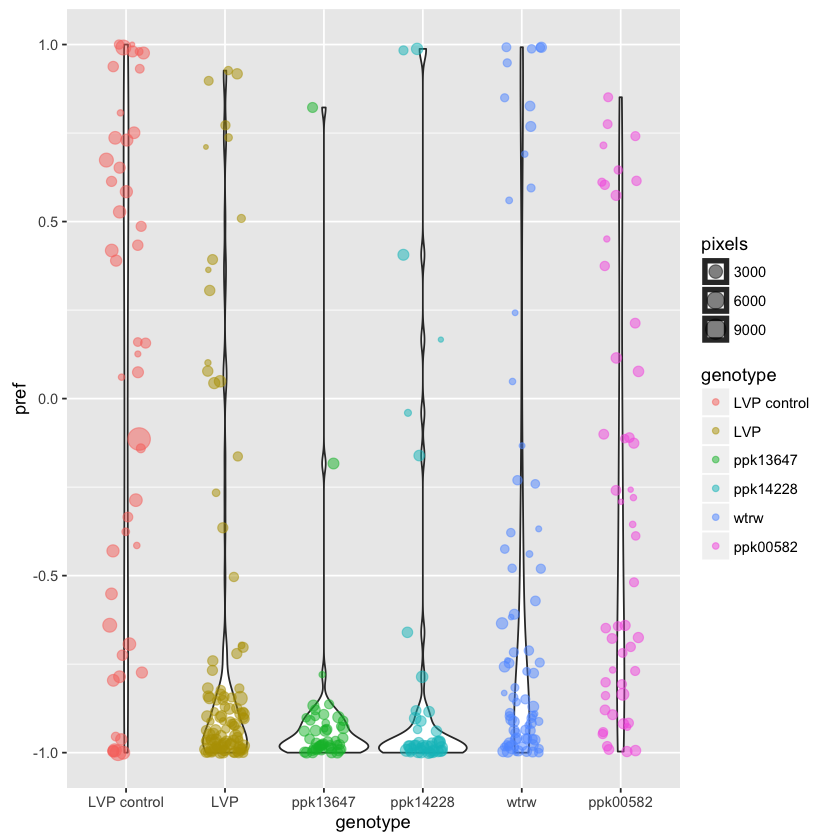

In [10]:
preference_plot.filtered.violin <- ggplot(data=all_preference.filtered,aes(size=pixels,x=genotype,y=pref)) + geom_violin() + geom_jitter(width=0.5,alpha=0.5,aes(colour=genotype))
preference_plot.filtered.violin

In [11]:
ggsave(filename = 'violin_dot_size.pdf',plot = preference_plot.filtered.violin,dpi = 300)

Saving 7 x 7 in image
